> # Chapter02 - Overfitting and Regularization
***

     Boston Extended-set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

from sklearn.linear_model import LinearRegression

## Overfitting

Boston Extended Dataset (Overfitting 의 좋은 예시)

In [2]:
X_data, y_data = mglearn.datasets.load_extended_boston()

print("X data 의 shape:",X_data.shape)
print("y data 의 shape:",y_data.shape)

X data 의 shape: (506, 104)
y data 의 shape: (506,)


In [3]:
pd.DataFrame(X_data)

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,...,0.043270,0.059749,0.208015,0.018655,0.082503,0.287234,0.025759,1.000000,0.089680,0.008042
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,...,0.011017,0.058064,0.104962,0.021462,0.306021,0.553191,0.113111,1.000000,0.204470,0.041808
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,...,0.011017,0.058064,0.103885,0.006661,0.306021,0.547514,0.035109,0.979580,0.062814,0.004028
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,...,0.004461,0.043345,0.066412,0.002230,0.421118,0.645222,0.021667,0.988585,0.033197,0.001115
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,...,0.004461,0.043345,0.066794,0.006635,0.421118,0.648936,0.064464,1.000000,0.099338,0.009868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,...,0.026936,0.146662,0.162090,0.035958,0.798551,0.882553,0.195787,0.975392,0.216382,0.048003
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,...,0.026936,0.146662,0.164122,0.033286,0.798551,0.893617,0.181239,1.000000,0.202815,0.041134
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,...,0.026936,0.146662,0.164122,0.017707,0.798551,0.893617,0.096414,1.000000,0.107892,0.011641
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,...,0.026936,0.146662,0.162694,0.021512,0.798551,0.885843,0.117127,0.982677,0.129930,0.017180


### DataFrame 을 train test 로 나눈다 & Linear Regression library 를 사용하여 W 값 예측

### Shuffle data and Split train, Test

##### 1. Shuffle

In [4]:
N = X_data.shape[0]

In [5]:
np.random.seed(3)

idx = np.random.permutation(N)
print(len(idx))

506


In [6]:
shuffle_X = X_data[idx]
shuffle_y = y_data[idx]

##### 2. Split train test

In [7]:
# 3:1 의 비율로 train test 를 나눔
n = int(N * (3/4))

# train data
X_train = shuffle_X[:n]
y_train = shuffle_y[:n]

In [8]:
# test data
X_test = shuffle_X[n:]
y_test = shuffle_y[n:]

In [9]:
print(X_train.shape)
print(X_test.shape)
print(X_train.shape[0] + X_test.shape[0])

(379, 104)
(127, 104)
506


### Perform Linear Regression

In [10]:
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

In [11]:
# Loss function
def MSE(real, predict):
    return ((real-predict)**2).mean()

### model.score → R square

모델의 성능을 평가하기 위해 R^2 (R square) 를 이용

$
\begin{align}
R^{2} = 1 - {\sum(오차^2) \over \sum(편차^2)}
\end{align}
$

오차 = 실제값 - 예측값<br>
편차 = 실제값 - 평균값<br>

예측을 완벽하게 해서 실제값 = 예측값 이라면? → R^2 = 1<br>
예측을 모두 평균값으로 했다면? → R^2 = 0 (쓸 수 없는 모델)

##### R^2 과 MSE 를 구해보자

In [12]:
print("Training R^2 score:{:0.2f}".format(reg.score(X_train, y_train)))
print("Test R^2 score:{:0.2f}".format(reg.score(X_test, y_test)))
print('Mean squared error:{:0.2f}'.format(MSE(y_test, y_pred)))

Training R^2 score:0.94
Test R^2 score:0.51
Mean squared error:40.31


##### W 의 값은?

가장 높은 W 값과 가장 낮은 W 값을 3개씩 가져와보자

In [13]:
W = reg.coef_

In [14]:
top_3_idx = np.argsort(W)[-3:]
bottom_3_idx = np.argsort(W)[:3]

In [15]:
top_3_values = [W[i] for i in top_3_idx]
bottom_3_values = [W[i] for i in bottom_3_idx]

In [16]:
print("Linear Regression의 가장 높은 W 의 값 3개 =>",["{:0.2f}".format(x) for x in top_3_values])
print("Linear Regression의 가장 낮은 W 의 값 3개 =>",["{:0.2f}".format(x) for x in bottom_3_values])

Linear Regression의 가장 높은 W 의 값 3개 => ['855.62', '1800.86', '3962.11']
Linear Regression의 가장 낮은 W 의 값 3개 => ['-1224.22', '-844.95', '-279.20']


In [17]:
### Optional (함수처리)

def get_top_bottom(data, count):
    top_idx = np.argsort(data)[-count:]
    bottom_idx = np.argsort(data)[:count]
    
    top_values = [data[i] for i in top_idx]
    bottom_values = [data[i] for i in bottom_idx]
    
    return top_values, bottom_values

## Regularization
<br>
Training Set 의 Score 과 Test Set 의 Score 가 너무 차이가 난다<br>
 → Overfitting 이다<br>
 → Regularization 필요

### Ridge Regression

In [18]:
from sklearn.linear_model import Ridge

ridge1 = Ridge()

ridge1.fit(X_train, y_train)
ridge1_pred = ridge1.predict(X_test)

In [19]:
print("Training score:{:0.2f}".format(ridge1.score(X_train, y_train)))
print("Test score:{:0.2f}".format(ridge1.score(X_test, y_test)))
print("Mean squared error:{:0.2f}".format(MSE(y_test, ridge1_pred)))

Training score:0.87
Test score:0.81
Mean squared error:15.81


##### W values?

In [20]:
W = ridge1.coef_

In [21]:
top_values, bottom_values = get_top_bottom(W,3)

print("가장 높은 W 의 값 3개 =>",["{:0.2f}".format(x) for x in top_values])
print("가장 낮은 W 의 값 3개 =>",["{:0.2f}".format(x) for x in bottom_values])

가장 높은 W 의 값 3개 => ['8.92', '10.46', '17.36']
가장 낮은 W 의 값 3개 => ['-9.52', '-8.48', '-7.32']


##### W 의 크기가 확연하게 줄었음을 확인 할 수 있다

#### Lambda (alpha 의 크기를 바꿔보자)

In [22]:
ridge01 = Ridge(alpha=0.1)

ridge01.fit(X_train, y_train)

ridge_pred01 = ridge01.predict(X_test)

print("Training score:{:0.2f}".format(ridge01.score(X_train, y_train)))
print("Test score:{:0.2f}".format(ridge01.score(X_test, y_test)))
print("Mean squared error:{:0.2f}".format(MSE(y_test, ridge_pred01)))

Training score:0.91
Test score:0.85
Mean squared error:12.56


In [23]:
ridge05 = Ridge(alpha=0.5)
ridge05.fit(X_train, y_train)

ridge_pred05 = ridge05.predict(X_test)

print("Training score:{:0.2f}".format(ridge05.score(X_train, y_train)))
print("Test score:{:0.2f}".format(ridge05.score(X_test, y_test)))
print("Mean squared error:{:0.2f}".format(MSE(y_test, ridge_pred05)))

Training score:0.88
Test score:0.83
Mean squared error:14.17


In [24]:
ridge10 = Ridge(alpha=10)
ridge10.fit(X_train, y_train)

ridge_pred10 = ridge10.predict(X_test)

print("Training score:{:0.2f}".format(ridge10.score(X_train, y_train)))
print("Test score:{:0.2f}".format(ridge10.score(X_test, y_test)))
print("Mean squared error:{:0.2f}".format(MSE(y_test, ridge_pred10)))

Training score:0.77
Test score:0.71
Mean squared error:24.04


### Score  Plotting

In [25]:
# alpha 값을 연속적으로 정의
alpha = []

for i in range(1,101,1):
    alpha.append(i/10)

In [26]:
train_score = []
test_score = []

for i in alpha:
    ridge = Ridge(alpha=i)
    ridge.fit(X_train,y_train)
    
    ridge_train_score = ridge.score(X_train, y_train)
    ridge_test_score = ridge.score(X_test, y_test)

    train_score.append(ridge_train_score)
    test_score.append(ridge_test_score)

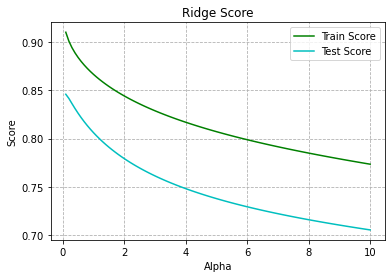

In [27]:
plt.grid(linestyle='--')

plt.plot(alpha,train_score, color="g", label="Train Score")
plt.plot(alpha,test_score, color="c", label="Test Score")

plt.title("Ridge Score")
plt.legend(loc='best')

plt.xlabel("Alpha")
plt.ylabel("Score")

plt.show()

### W 의 크기 확인

다음의 그림으로 w 값의 변화량을 알 수 있다<br>
alpha 값이 클수록 규제 강도가 강해지기 때문에 w 의 절대값이 크기가 작아짐을 알 수 있다.<br>
https://matplotlib.org/api/markers_api.html 에서 그래프의 dot 모양을 확인 할 수 있다

Text(0, 0.5, 'W values')

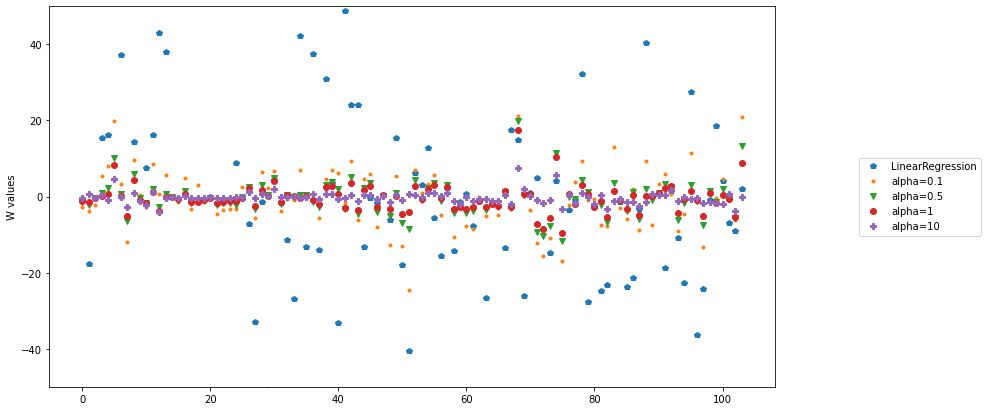

In [28]:
plt.figure(figsize=(13,7))

plt.plot(reg.coef_, 'p', label="LinearRegression") # o = 원
plt.plot(ridge01.coef_, '.', label="alpha=0.1") # v = 아래 삼각형
plt.plot(ridge05.coef_, 'v', label="alpha=0.5") # v = 아래 삼각형
plt.plot(ridge1.coef_, 'o', label="alpha=1") # s = 사각형
plt.plot(ridge10.coef_, 'P', label="alpha=10") # ^ = 윗 삼각형

plt.ylim(-50, 50) # y 축의 범위

plt.legend(loc='center', bbox_to_anchor=(1.2, 0.5)) # bbox_to_anchor=(1.2, 0.5) <= 레전드의 위치

plt.ylabel("W values")

### Lasso Regression

Ridge 를 했으니 당연히 Lasso 도 해주어야한다!

In [29]:
from sklearn.linear_model import Lasso

lasso1 = Lasso()

lasso1.fit(X_train, y_train)
lasso1_pred = lasso1.predict(X_test)

In [30]:
print("Training score:{:0.2f}".format(lasso1.score(X_train, y_train)))
print("Test score:{:0.2f}".format(lasso1.score(X_test, y_test)))
print("Mean squared error:{:0.2f}".format(MSE(y_test, lasso1_pred)))

print("Features:", np.sum(lasso1.coef_ != 0)) # lasso.coef_ 는 w 이므로 w 의 값이  0이 아닌 것만 np.sum 으로 카운트

Training score:0.24
Test score:0.23
Mean squared error:62.44
Features: 4


In [31]:
W = lasso1.coef_
W

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        , -4.55880522, -0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.  

In [32]:
# warning message 제거

import warnings
warnings.filterwarnings(action='ignore')

In [33]:
lasso001 = Lasso(alpha=0.01)

lasso001.fit(X_train, y_train)

lasso_pred001 = lasso001.predict(X_test)

print("Training score:{:0.2f}".format(lasso001.score(X_train, y_train)))
print("Test score:{:0.2f}".format(lasso001.score(X_test, y_test)))
print("Mean squared error:{:0.2f}".format(MSE(y_test, lasso_pred001)))

print("Features:", np.sum(lasso001.coef_ != 0))

Training score:0.87
Test score:0.82
Mean squared error:15.04
Features: 31


In [34]:
lasso0001 = Lasso(alpha=0.001)

lasso0001.fit(X_train, y_train)

lasso_pred0001 = lasso0001.predict(X_test)

print("Training score:{:0.2f}".format(lasso0001.score(X_train, y_train)))
print("Test score:{:0.2f}".format(lasso0001.score(X_test, y_test)))
print("Mean squared error:{:0.2f}".format(MSE(y_test, lasso_pred0001)))

print("Features:", np.sum(lasso0001.coef_ != 0))

Training score:0.92
Test score:0.83
Mean squared error:13.75
Features: 78


In [35]:
lasso00001 = Lasso(alpha=0.0001)

lasso00001.fit(X_train, y_train)

lasso_pred00001 = lasso00001.predict(X_test)

print("Training score:{:0.2f}".format(lasso00001.score(X_train, y_train)))
print("Test score:{:0.2f}".format(lasso00001.score(X_test, y_test)))
print("Mean squared error:{:0.2f}".format(MSE(y_test, lasso_pred00001)))

print("Features:", np.sum(lasso00001.coef_ != 0))

Training score:0.93
Test score:0.82
Mean squared error:14.89
Features: 101


In [36]:
# alpha 값을 연속적으로 정의
alpha = []

for i in range(1,101,1):
    alpha.append(i/100)

In [37]:
train_score = []
test_score = []

for i in alpha:
    lasso = Lasso(alpha=i)
    lasso.fit(X_train,y_train)
    
    lasso_train_score = lasso.score(X_train, y_train)
    lasso_test_score = lasso.score(X_test, y_test)

    train_score.append(lasso_train_score)
    test_score.append(lasso_test_score)

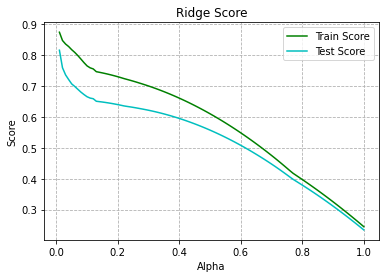

In [38]:
plt.grid(linestyle='--')

plt.plot(alpha,train_score, color="g", label="Train Score")
plt.plot(alpha,test_score, color="c", label="Test Score")

plt.title("Ridge Score")
plt.legend(loc='best')

plt.xlabel("Alpha")
plt.ylabel("Score")

plt.show()

Text(0, 0.5, 'W values')

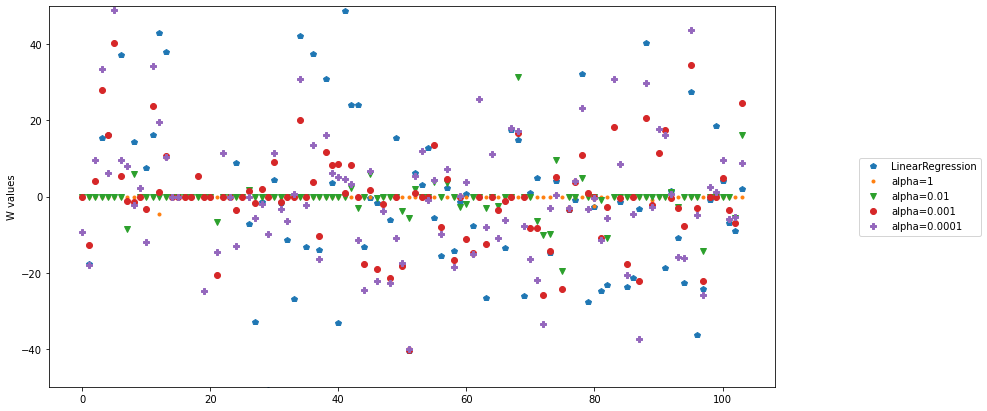

In [39]:
# alpha=1 이면 규제가 굉장히 커지므로 대부분의 w 값이 0 으로 수렴하게 된다
# 반대로 alpha 값이 작아지면 작아질수록 w 값이 점점 규제를 받지 않아 LinearRegression 과 같은 분포를 띄게 된다

plt.figure(figsize=(13,7))

plt.plot(reg.coef_, 'p', label="LinearRegression") # o = 원
plt.plot(lasso1.coef_, '.', label="alpha=1") # v = 아래 삼각형
plt.plot(lasso001.coef_, 'v', label="alpha=0.01") # v = 아래 삼각형
plt.plot(lasso0001.coef_, 'o', label="alpha=0.001") # s = 사각형
plt.plot(lasso00001.coef_, 'P', label="alpha=0.0001") # ^ = 윗 삼각형

plt.ylim(-50, 50) # y 축의 범위

plt.legend(loc='center', bbox_to_anchor=(1.2, 0.5)) # bbox_to_anchor=(1.2, 0.5) <= 레전드의 위치

plt.ylabel("W values")